This Notebook is geared towards selecting the best location for the opening of a new restaurant in Miami, Florida. The idea stems from IBM Data Science Capstone Project.

In [36]:
#Web-Scrapping
from bs4 import BeautifulSoup
import requests
import pandas as pd
wiki_data=requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami').text
soup=BeautifulSoup(wiki_data,'xml')
miami_areas_table=soup.find('table',{'class':'wikitable sortable'})

#Data legibility
column_names = ['Neighborhood','Demonym','Population 2010', 'Population/SqKm','Sub-neighborhoods','Coordinates']
df_miami_areas=pd.DataFrame(columns=column_names)
for tr_cell in miami_areas_table.find_all('tr'):
    data=[]
    for td_cell in tr_cell.find_all('td'):
        data.append(td_cell.text.strip())
        if len(data)==6:
            df_miami_areas.loc[len(df_miami_areas)]=data
df_miami_areas.head(10)

,Neighborhood,Demonym,Population 2010,Population/SqKm,Sub-neighborhoods,Coordinates
0,Allapattah,,"54,289","4,401",,"25.815,-80.224"
1,Arts & Entertainment District,,"11,033","7,948",,"25.799,-80.190"
2,Brickell,Brickellite,"31,759","14,541",West Brickell,"25.758,-80.193"
3,Buena Vista,,"9,058","3,540",Buena Vista East Historic District and Design ...,"25.813,-80.192"
4,Coconut Grove,Grovite,"20,076","3,091","Center Grove, Northeast Coconut Grove, Southwe...","25.712,-80.257"
5,Coral Way,,"35,062","4,496","Coral Gate, Golden Pines, Shenandoah, Historic...","25.750,-80.283"
6,Design District,,"3,573","3,623",,"25.813,-80.193"
7,Downtown,Downtowner,"71,000 (13,635 CBD only)","10,613","Brickell, Central Business District (CBD), Dow...","25.774,-80.193"
8,Edgewater,,"15,005","6,675",,"25.802,-80.190"
9,Flagami,,"50,834","5,665","Alameda, Grapeland Heights, and Fairlawn","25.762,-80.316"


In [37]:
#Removal of the columns Demonym and Sub-neighborhoods
df_miami_areas.drop(['Demonym','Sub-neighborhoods'], axis=1, inplace = True)
df_miami_areas

,Neighborhood,Population 2010,Population/SqKm,Coordinates
0,Allapattah,"54,289","4,401","25.815,-80.224"
1,Arts & Entertainment District,"11,033","7,948","25.799,-80.190"
2,Brickell,"31,759","14,541","25.758,-80.193"
3,Buena Vista,"9,058","3,540","25.813,-80.192"
4,Coconut Grove,"20,076","3,091","25.712,-80.257"
5,Coral Way,"35,062","4,496","25.750,-80.283"
6,Design District,"3,573","3,623","25.813,-80.193"
7,Downtown,"71,000 (13,635 CBD only)","10,613","25.774,-80.193"
8,Edgewater,"15,005","6,675","25.802,-80.190"
9,Flagami,"50,834","5,665","25.762,-80.316"


In [38]:
#Removal of the last row, which summarizes respective columns
df_miami_areas.drop(index=25, axis=0, inplace=True)
df_miami_areas

,Neighborhood,Population 2010,Population/SqKm,Coordinates
0,Allapattah,"54,289","4,401","25.815,-80.224"
1,Arts & Entertainment District,"11,033","7,948","25.799,-80.190"
2,Brickell,"31,759","14,541","25.758,-80.193"
3,Buena Vista,"9,058","3,540","25.813,-80.192"
4,Coconut Grove,"20,076","3,091","25.712,-80.257"
5,Coral Way,"35,062","4,496","25.750,-80.283"
6,Design District,"3,573","3,623","25.813,-80.193"
7,Downtown,"71,000 (13,635 CBD only)","10,613","25.774,-80.193"
8,Edgewater,"15,005","6,675","25.802,-80.190"
9,Flagami,"50,834","5,665","25.762,-80.316"


In [39]:
df_miami_areas[['Latitude','Longitude']]=df_miami_areas.Coordinates.str.split(",", expand=True)
df_miami_areas.drop(['Coordinates'],axis=1,inplace=True)

#From an online research, the ZIP Code of the Health District is 33136, Fl, 
# which corresponds to a latitute of 25.782 and a longitude of -80.204. 
#These coordinates are to be included in the dataframe

df_miami_areas.at[11,'Latitude']=25.782
df_miami_areas.at[11,'Longitude']= -80.204
df_miami_areas.at[7,'Population 2010']='{:,}'.format(71000)
df_miami_areas

,Neighborhood,Population 2010,Population/SqKm,Latitude,Longitude
0,Allapattah,"54,289","4,401",25.815,-80.224
1,Arts & Entertainment District,"11,033","7,948",25.799,-80.190
2,Brickell,"31,759","14,541",25.758,-80.193
3,Buena Vista,"9,058","3,540",25.813,-80.192
4,Coconut Grove,"20,076","3,091",25.712,-80.257
5,Coral Way,"35,062","4,496",25.750,-80.283
6,Design District,"3,573","3,623",25.813,-80.193
7,Downtown,"71,000","10,613",25.774,-80.193
8,Edgewater,"15,005","6,675",25.802,-80.190
9,Flagami,"50,834","5,665",25.762,-80.316


In [5]:
#Collection of neighborhoods data from Foursquare

#Foursquare credentials
CLIENT_ID = 'F35Z5GRQ5EB2GE5FDYR2YLUGAW1VS3UID12WNNBNNDDRWEUD' 
CLIENT_SECRET = 'CUGB54H5FZ2XE5MKMNVNCCBPHT502KY2TSSU30DRJELJVZLH' 
VERSION = '20200309'

def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
miami_venues = getNearbyVenues(names=df_miami_areas['Neighborhood'],latitudes=df_miami_areas['Latitude'],longitudes=df_miami_areas['Longitude'])

Allapattah
Arts & Entertainment District
Brickell
Buena Vista
Coconut Grove
Coral Way
Design District
Downtown
Edgewater
Flagami
Grapeland Heights
Health District
Liberty City
Little Haiti
Little Havana
Lummus Park
Midtown
Overtown
Park West
The Roads
Upper Eastside
Venetian Islands
Virginia Key
West Flagler
Wynwood


In [6]:
miami_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allapattah,2,2,2,2,2,2
Arts & Entertainment District,19,19,19,19,19,19
Brickell,56,56,56,56,56,56
Buena Vista,39,39,39,39,39,39
Coconut Grove,3,3,3,3,3,3
Coral Way,10,10,10,10,10,10
Design District,38,38,38,38,38,38
Downtown,64,64,64,64,64,64
Edgewater,50,50,50,50,50,50


In [7]:
miami_list_of_restaurants=miami_venues[miami_venues['Venue Category'].str.contains('Restaurant')]
miami_list_of_restaurants

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
5,Arts & Entertainment District,25.799,-80.190,Plant Food + Wine Miami,25.800452,-80.192805,Restaurant
13,Arts & Entertainment District,25.799,-80.190,Latin Cafe 2000,25.801025,-80.188909,Cuban Restaurant
14,Arts & Entertainment District,25.799,-80.190,Rincon Escondido Cafe,25.802719,-80.189102,Tapas Restaurant
15,Arts & Entertainment District,25.799,-80.190,NOA Catering,25.803114,-80.190942,Restaurant
20,Arts & Entertainment District,25.799,-80.190,La Palapa Hondureña,25.802788,-80.188872,Restaurant
...,...,...,...,...,...,...,...
546,Wynwood,25.804,-80.199,Crudos Fusion Art,25.800015,-80.200024,Asian Restaurant
551,Wynwood,25.804,-80.199,The Annex,25.803675,-80.194038,American Restaurant
552,Wynwood,25.804,-80.199,freshii,25.799630,-80.199228,Restaurant
554,Wynwood,25.804,-80.199,Alter,25.799707,-80.199556,Restaurant


In [8]:
rest=miami_list_of_restaurants.groupby('Neighborhood').count()
nb_of_restaurants=rest[["Venue"]]
nb_of_restaurants=nb_of_restaurants.rename(columns={'Venue':'Number of restaurants'})
nb_of_restaurants.sort_values(by=['Number of restaurants'],ascending=False)

,Number of restaurants
Neighborhood,
Downtown,24
Wynwood,22
Brickell,22
Midtown,18
Edgewater,16
Buena Vista,9
Design District,9
Little Haiti,7
Lummus Park,6


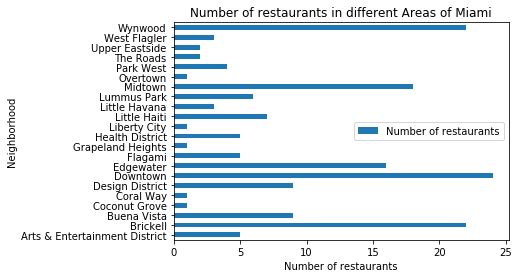

In [10]:
#Bar chart of the number of restaurant in each neighborhood
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os 
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors 
import numpy as np 

nb_of_restaurants.plot(kind='barh')
plt.title('Number of restaurants in different Areas of Miami')
plt.ylabel('Neighborhood')
plt.xlabel('Number of restaurants')
plt.show()

In [18]:
#One hot encoding
miami_onehot = pd.get_dummies(miami_venues[['Venue Category']], prefix="", prefix_sep="")
miami_onehot.drop(['Neighborhood'],axis=1,inplace=True) 
miami_onehot.insert(loc=0, column='Neighborhood', value=miami_venues['Neighborhood'] )
miami_onehot.shape

(562, 153)

In [19]:
miami_grouped = miami_onehot.groupby('Neighborhood').mean().reset_index()
miami_grouped.head()

,Neighborhood,Accessories Store,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,...,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Allapattah,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,Arts & Entertainment District,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.052632,0.0,0.0,0.000000,0.0
2,Brickell,0.0,0.035714,0.0,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.017857,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,Buena Vista,0.0,0.025641,0.0,0.025641,0.025641,0.000000,0.025641,0.051282,0.025641,...,0.0,0.0,0.0,0.000000,0.025641,0.000000,0.0,0.0,0.025641,0.0
4,Coconut Grove,0.0,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [20]:
miami_restaurant=miami_grouped.filter(regex='Restaurant')
miami_rest=pd.concat([miami_grouped['Neighborhood'],miami_restaurant],axis=1, join='inner')
miami_rest_pivot=pd.pivot_table(miami_rest, index=["Neighborhood"])

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
neighborhoods_restaurants_sorted = pd.DataFrame(columns=columns)
neighborhoods_restaurants_sorted['Neighborhood'] = miami_rest['Neighborhood']

for ind in np.arange(miami_rest.shape[0]):
    neighborhoods_restaurants_sorted.iloc[ind, 1:] = return_most_common_venues(miami_rest.iloc[ind, :], num_top_venues)

neighborhoods_restaurants_sorted.head()

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Allapattah,Venezuelan Restaurant,Indian Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant
1,Arts & Entertainment District,Restaurant,Tapas Restaurant,Cuban Restaurant,Chinese Restaurant,French Restaurant,Fast Food Restaurant,Empanada Restaurant,Eastern European Restaurant,Comfort Food Restaurant,Venezuelan Restaurant
2,Brickell,Italian Restaurant,Japanese Restaurant,American Restaurant,Argentinian Restaurant,Seafood Restaurant,Restaurant,Mexican Restaurant,French Restaurant,Latin American Restaurant,Mediterranean Restaurant
3,Buena Vista,Italian Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Indian Restaurant,Asian Restaurant,Arepa Restaurant,Caribbean Restaurant,Brazilian Restaurant
4,Coconut Grove,American Restaurant,Indian Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant


In [21]:
from sklearn.cluster import KMeans
import os 
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors 
from geopy.geocoders import Nominatim
# set number of clusters
kclusters = 24

miami_grouped_clustering = miami_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(miami_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([ 2, 14, 19, 18,  4,  8, 18, 23, 22,  7], dtype=int32)

In [22]:
# add clustering labels
neighborhoods_restaurants_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

miami_merge = df_miami_areas

# merge toronto_grouped with toronto to add latitude/longitude for each neighborhood
miami_merge = miami_merge.join(neighborhoods_restaurants_sorted.set_index('Neighborhood'), on='Neighborhood')


miami_merge.head()

,Neighborhood,Population 2010,Population/SqKm,Latitude,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Allapattah,"54,289","4,401",25.815,-80.224,2,Venezuelan Restaurant,Indian Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant
1,Arts & Entertainment District,"11,033","7,948",25.799,-80.190,14,Restaurant,Tapas Restaurant,Cuban Restaurant,Chinese Restaurant,French Restaurant,Fast Food Restaurant,Empanada Restaurant,Eastern European Restaurant,Comfort Food Restaurant,Venezuelan Restaurant
2,Brickell,"31,759","14,541",25.758,-80.193,19,Italian Restaurant,Japanese Restaurant,American Restaurant,Argentinian Restaurant,Seafood Restaurant,Restaurant,Mexican Restaurant,French Restaurant,Latin American Restaurant,Mediterranean Restaurant
3,Buena Vista,"9,058","3,540",25.813,-80.192,18,Italian Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Indian Restaurant,Asian Restaurant,Arepa Restaurant,Caribbean Restaurant,Brazilian Restaurant
4,Coconut Grove,"20,076","3,091",25.712,-80.257,4,American Restaurant,Indian Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant


In [23]:
miami_merge['Latitude']=miami_merge['Latitude'].astype(float)
miami_merge['Longitude']=miami_merge['Longitude'].astype(float)
miami_merge.head()

,Neighborhood,Population 2010,Population/SqKm,Latitude,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Allapattah,"54,289","4,401",25.815,-80.224,2,Venezuelan Restaurant,Indian Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant
1,Arts & Entertainment District,"11,033","7,948",25.799,-80.190,14,Restaurant,Tapas Restaurant,Cuban Restaurant,Chinese Restaurant,French Restaurant,Fast Food Restaurant,Empanada Restaurant,Eastern European Restaurant,Comfort Food Restaurant,Venezuelan Restaurant
2,Brickell,"31,759","14,541",25.758,-80.193,19,Italian Restaurant,Japanese Restaurant,American Restaurant,Argentinian Restaurant,Seafood Restaurant,Restaurant,Mexican Restaurant,French Restaurant,Latin American Restaurant,Mediterranean Restaurant
3,Buena Vista,"9,058","3,540",25.813,-80.192,18,Italian Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Indian Restaurant,Asian Restaurant,Arepa Restaurant,Caribbean Restaurant,Brazilian Restaurant
4,Coconut Grove,"20,076","3,091",25.712,-80.257,4,American Restaurant,Indian Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant


In [24]:
address = 'Miami, FL'

geolocator = Nominatim(user_agent="mia_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Miami are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Miami are 25.7742658, -80.1936589.


In [25]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(miami_merge['Latitude'], miami_merge['Longitude'], miami_merge['Neighborhood'], miami_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
###From an online research, the ZIP Code of the Health District is 33136, Fl, which corresponds to a latitute of 25.782 and a longitude of -80.204. These coordinates are to be included in the dataframe
df_miami_areas.at[11,'Latitude']=25.782
df_miami_areas.at[11,'Longitude']= -80.204
df_miami_areas.at[7,'Population 2010']='{:,}'.format(71000)
df_miami_areas.at[16,'Population 2010']='{:,}'.format(3162)
df_miami_areas.at[21,'Population 2010']='{:,}'.format(38606)
df_miami_areas.at[22,'Population 2010']='{:,}'.format(13054)
df_miami_areas.head()


,Neighborhood,Population 2010,Population/SqKm,Latitude,Longitude
0,Allapattah,"54,289","4,401",25.815,-80.224
1,Arts & Entertainment District,"11,033","7,948",25.799,-80.190
2,Brickell,"31,759","14,541",25.758,-80.193
3,Buena Vista,"9,058","3,540",25.813,-80.192
4,Coconut Grove,"20,076","3,091",25.712,-80.257


In [42]:
df_miami_areas.insert(1, 'Number of restaurants', [0,5,22,9,1,1,9,24,16,5,1,5,1,7,3,6,18,1,4,2,2,0,0,2,22], True)
df_miami_areas

,Neighborhood,Number of restaurants,Population 2010,Population/SqKm,Latitude,Longitude
0,Allapattah,0,"54,289","4,401",25.815,-80.224
1,Arts & Entertainment District,5,"11,033","7,948",25.799,-80.190
2,Brickell,22,"31,759","14,541",25.758,-80.193
3,Buena Vista,9,"9,058","3,540",25.813,-80.192
4,Coconut Grove,1,"20,076","3,091",25.712,-80.257
5,Coral Way,1,"35,062","4,496",25.750,-80.283
6,Design District,9,"3,573","3,623",25.813,-80.193
7,Downtown,24,"71,000","10,613",25.774,-80.193
8,Edgewater,16,"15,005","6,675",25.802,-80.190
9,Flagami,5,"50,834","5,665",25.762,-80.316


In [44]:

df_miami_areas['Population 2010']=df_miami_areas['Population 2010'].str.replace(',','').astype(float)

df_miami_areas

,Neighborhood,Number of restaurants,Population 2010,Population/SqKm,Latitude,Longitude
0,Allapattah,0,54289.0,"4,401",25.815,-80.224
1,Arts & Entertainment District,5,11033.0,"7,948",25.799,-80.190
2,Brickell,22,31759.0,"14,541",25.758,-80.193
3,Buena Vista,9,9058.0,"3,540",25.813,-80.192
4,Coconut Grove,1,20076.0,"3,091",25.712,-80.257
5,Coral Way,1,35062.0,"4,496",25.750,-80.283
6,Design District,9,3573.0,"3,623",25.813,-80.193
7,Downtown,24,71000.0,"10,613",25.774,-80.193
8,Edgewater,16,15005.0,"6,675",25.802,-80.190
9,Flagami,5,50834.0,"5,665",25.762,-80.316


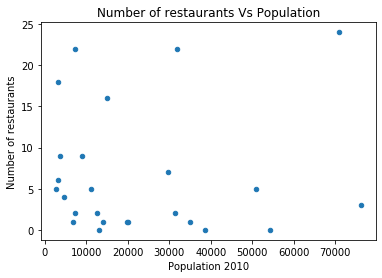

In [45]:
df_miami_areas['Number of restaurants']=df_miami_areas['Number of restaurants'].astype(float)
df_miami_areas.plot(kind='scatter', x='Population 2010', y='Number of restaurants')
plt.title('Number of restaurants Vs Population')
plt.xlabel('Population 2010')
plt.ylabel('Number of restaurants')
plt.show()

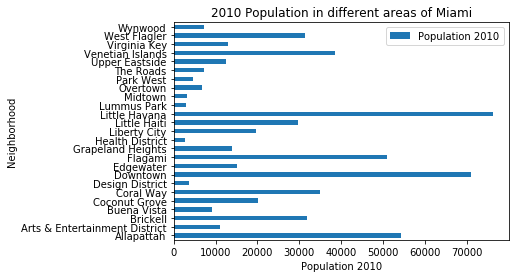

In [46]:
miami_pop=df_miami_areas[['Neighborhood','Population 2010']]
p_mia=miami_pop.set_index('Neighborhood')
p_mia.plot(kind='barh')
plt.title('2010 Population in different areas of Miami')
plt.ylabel('Neighborhood')
plt.xlabel('Population 2010')
plt.show()

In [47]:
#Data collected from https://www.homesnacks.net/richest-neighborhoods-in-miami-128997/
data_2020 =[['Islands', 163112],['Coconut Grove', 91401],['Downtown',71374],['Wynwood',53417],
       ['Upper Eastside',51180],['Coral Way',49574],['West Flager', 31236],['Flagami',30687],['Little Haiti',26753],
      ['Little Havana',24491],['Model City',24443], ['Allapattah', 23663], ['Overtown', 19558]]
neighborhood_ranking=pd.DataFrame(data_2020, columns=['Neighborhood', 'Median Household Income<'])
neigh_ranking=neighborhood_ranking.set_index('Neighborhood')
neigh_ranking

,Median Household Income<
Neighborhood,
Islands,163112
Coconut Grove,91401
Downtown,71374
Wynwood,53417
Upper Eastside,51180
Coral Way,49574
West Flager,31236
Flagami,30687
Little Haiti,26753


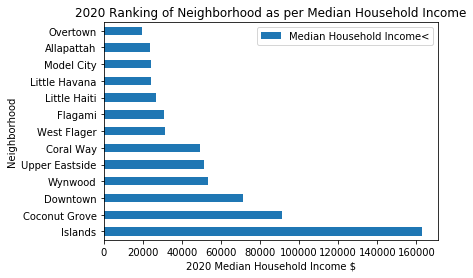

In [48]:
neigh_ranking.plot(kind='barh')
plt.title('2020 Ranking of Neighborhood as per Median Household Income')
plt.ylabel('Neighborhood')
plt.xlabel('2020 Median Household Income $')
plt.show()

In [49]:
#Data obtaines from: https://www.areavibes.com/miami-fl/most-dangerous-neighborhoods/
data_3=[['Overtown', 132], ['Model City',118],['Downtown', 36],['Little Haiti', 29],['Allapattah', 7],['Wynwood', -11],
       ['Upper Eastside',-15],['Little Havana',-33],['South Coconut Grove',-58],['Islands',-60],['West Flagler',-69],
       ['North Coconut Grove', -73],['FLagami',-74],['Coral Way',-79]]
crime_rates=pd.DataFrame(data_3, columns=['Neighborhood','% of Crime in relation to the avergave crime rate in Miami']).set_index('Neighborhood')
crime_rates

,% of Crime in relation to the avergave crime rate in Miami
Neighborhood,
Overtown,132
Model City,118
Downtown,36
Little Haiti,29
Allapattah,7
Wynwood,-11
Upper Eastside,-15
Little Havana,-33
South Coconut Grove,-58


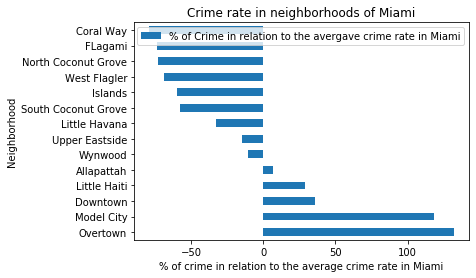

In [50]:
crime_rates.plot(kind='barh')
plt.title('Crime rate in neighborhoods of Miami')
plt.ylabel('Neighborhood')
plt.xlabel('% of crime in relation to the average crime rate in Miami')
plt.show()